<a href="https://colab.research.google.com/github/AI-Junction/Pneumonia-Detection/blob/master/PneumoniaDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check memory allocation to this sesssion

In [0]:
!df -h

Confirm TensorFlow can see the GPU

Simply select "GPU" in the Accelerator drop-down in Notebook Settings (either through the Edit menu or the command palette at cmd/ctrl-shift-P).

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Check RAM allocation in current session

In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Observe TensorFlow speedup on GPU relative to CPU

**** Uncomment below cell if needed

In [0]:
'''

import tensorflow as tf
import timeit

# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.device('/cpu:0'):
  random_image_cpu = tf.random_normal((100, 100, 100, 3))
  net_cpu = tf.layers.conv2d(random_image_cpu, 32, 7)
  net_cpu = tf.reduce_sum(net_cpu)

with tf.device('/gpu:0'):
  random_image_gpu = tf.random_normal((100, 100, 100, 3))
  net_gpu = tf.layers.conv2d(random_image_gpu, 32, 7)
  net_gpu = tf.reduce_sum(net_gpu)

sess = tf.Session(config=config)

# Test execution once to detect errors early.
try:
  sess.run(tf.global_variables_initializer())
except tf.errors.InvalidArgumentError:
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise

def cpu():
  sess.run(net_cpu)
  
def gpu():
  sess.run(net_gpu)
  
# Runs the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

sess.close()

'''

'\n\nimport tensorflow as tf\nimport timeit\n\n# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth\nconfig = tf.ConfigProto()\nconfig.gpu_options.allow_growth = True\n\nwith tf.device(\'/cpu:0\'):\n  random_image_cpu = tf.random_normal((100, 100, 100, 3))\n  net_cpu = tf.layers.conv2d(random_image_cpu, 32, 7)\n  net_cpu = tf.reduce_sum(net_cpu)\n\nwith tf.device(\'/gpu:0\'):\n  random_image_gpu = tf.random_normal((100, 100, 100, 3))\n  net_gpu = tf.layers.conv2d(random_image_gpu, 32, 7)\n  net_gpu = tf.reduce_sum(net_gpu)\n\nsess = tf.Session(config=config)\n\n# Test execution once to detect errors early.\ntry:\n  sess.run(tf.global_variables_initializer())\nexcept tf.errors.InvalidArgumentError:\n  print(\n      \'\n\nThis error most likely means that this notebook is not \'\n      \'configured to use a GPU.  Change this in Notebook Settings via the \'\n      \'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n\')\n  raise\n\ndef cpu():\n  sess.run(ne

Check total memory allocation

*** Uncomment below cell only if needed

In [0]:
#!cat /proc/meminfo

Check versions of various libraries installed in this session of colaboratory

**** Uncomment below cell only if needed

In [0]:
'''

import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

'''

'\n\nimport sys #access to system parameters https://docs.python.org/3/library/sys.html\nprint("Python version: {}". format(sys.version))\n\nimport pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features\nprint("pandas version: {}". format(pd.__version__))\n\nimport matplotlib #collection of functions for scientific and publication-ready visualization\nprint("matplotlib version: {}". format(matplotlib.__version__))\n\nimport numpy as np #foundational package for scientific computing\nprint("NumPy version: {}". format(np.__version__))\n\nimport scipy as sp #collection of functions for scientific computing and advance mathematics\nprint("SciPy version: {}". format(sp.__version__)) \n\nimport IPython\nfrom IPython import display #pretty printing of dataframes in Jupyter notebook\nprint("IPython version: {}". format(IPython.__version__)) \n\nimport sklearn #collection of machine learning algorithms\nprint("scikit-learn versio

In [5]:
!pip install -U -q PyDrive
!git clone https://gist.github.com/dc7e60aa487430ea704a8cb3f2c5d6a6.git /tmp/colab_util_repo
!mv /tmp/colab_util_repo/colab_util.py colab_util.py 
!rm -r /tmp/colab_util_repo

Cloning into '/tmp/colab_util_repo'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40
Unpacking objects: 100% (40/40), done.


In [0]:
#!ls -l /tmp

In [0]:
from colab_util import *
drive_handler = GoogleDriveHandler()

In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install kaggle

In [6]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

#filename = "/content/.kaggle/kaggle.json"
#filename = "/.kaggle/kaggle.json"
filename = "kaggle.json"
#os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [7]:
!ls -lha kaggle.json



---x-wx--T 1 root root 65 Jan 23 03:04 kaggle.json


In [8]:
os.path.isdir("/root/.kaggle")

False

In [9]:
dir_kaggle = "/root/.kaggle"
if not os.path.isdir(dir_kaggle):
  !mkdir -p ~/.kaggle  
!cp kaggle.json ~/.kaggle/
os.path.isdir(dir_kaggle)

True

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

Create training and test data in this allocated session of colaboratory

In [0]:
!mkdir '/content/Pneumonia-Detection'

In [13]:
!kaggle competitions files -c rsna-pneumonia-detection-challenge

name                                  size  creationDate         
-----------------------------------  -----  -------------------  
stage_2_detailed_class_info.csv        2MB  2018-10-25 21:57:44  
stage_2_sample_submission.csv        155KB  2018-10-25 21:57:44  
stage_2_train_labels.csv               1MB  2018-10-25 21:57:45  
stage_2_test_images.zip              377MB  2018-10-25 21:57:54  
stage_2_train_images.zip               3GB  2018-10-25 21:59:27  
GCP Credits Request Link - RSNA.txt    55B  2018-10-25 22:02:52  


In [14]:
if not os.path.isfile("/content/Pneumonia-Detection/stage_2_test_images.zip"):
  !kaggle competitions download -c rsna-pneumonia-detection-challenge -f stage_2_detailed_class_info.csv -p "/content/Pneumonia-Detection/"
  !kaggle competitions download -c rsna-pneumonia-detection-challenge -f stage_2_sample_submission.csv -p "/content/Pneumonia-Detection/"
  !kaggle competitions download -c rsna-pneumonia-detection-challenge -f stage_2_train_labels.csv -p "/content/Pneumonia-Detection/"
  !kaggle competitions download -c rsna-pneumonia-detection-challenge -f stage_2_test_images.zip -p "/content/Pneumonia-Detection/"
  !kaggle competitions download -c rsna-pneumonia-detection-challenge -f stage_2_train_images.zip -p "/content/Pneumonia-Detection/"
  !kaggle competitions download -c rsna-pneumonia-detection-challenge -f GCP Credits Request Link - RSNA.txt -p "/content/Pneumonia-Detection/"


  0% 0.00/583k [00:00<?, ?B/s]
100% 583k/583k [00:00<00:00, 77.0MB/s]
  0% 0.00/155k [00:00<?, ?B/s]
100% 155k/155k [00:00<00:00, 47.3MB/s]
  0% 0.00/661k [00:00<?, ?B/s]
100% 661k/661k [00:00<00:00, 43.4MB/s]
 99% 373M/377M [00:05<00:00, 25.5MB/s]
100% 377M/377M [00:05<00:00, 66.0MB/s]
100% 3.29G/3.29G [00:33<00:00, 120MB/s]
100% 3.29G/3.29G [00:33<00:00, 106MB/s]
usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: unrecognized arguments: Request Link - RSNA.txt


In [15]:
!pip install pydicom

    100% |████████████████████████████████| 7.0MB 6.9MB/s 


In [0]:
if not os.path.isdir("/content/Pneumonia-Detection/train"):
  !mkdir "/content/Pneumonia-Detection/train"
  !unzip "/content/Pneumonia-Detection/stage_2_train_images.zip" -d "/content/Pneumonia-Detection/train"


In [0]:
if not os.path.isdir("/content/Pneumonia-Detection/test"):
  !mkdir "/content/Pneumonia-Detection/test"
  !unzip "/content/Pneumonia-Detection/stage_2_test_images.zip" -d "/content/Pneumonia-Detection/test"


In [18]:
if not os.path.isfile("/content/Pneumonia-Detection/stage_2_detailed_class_info.csv"):
  !unzip "/content/Pneumonia-Detection/stage_2_detailed_class_info.csv.zip" -d "/content/Pneumonia-Detection"


Archive:  /content/Pneumonia-Detection/stage_2_detailed_class_info.csv.zip
  inflating: /content/Pneumonia-Detection/stage_2_detailed_class_info.csv  


In [19]:
if not os.path.isfile("/content/Pneumonia-Detection/stage_2_train_labels.csv"):
  !unzip "/content/Pneumonia-Detection/stage_2_train_labels.csv.zip" -d "/content/Pneumonia-Detection"


Archive:  /content/Pneumonia-Detection/stage_2_train_labels.csv.zip
  inflating: /content/Pneumonia-Detection/stage_2_train_labels.csv  


In [0]:
import os
import csv
import random
import pydicom
import numpy as np
import pandas as pd
from skimage import io
from skimage import measure
from skimage.transform import resize

import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt
import matplotlib.patches as patches

In [0]:
# empty dictionary
pneumonia_locations = {}
# load table
with open(os.path.join('/content/Pneumonia-Detection/stage_2_train_labels.csv'), mode='r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]

In [22]:
# load and shuffle filenames
folder = '/content/Pneumonia-Detection/train'
filenames = os.listdir(folder)
random.shuffle(filenames)
# split into train and validation filenames
n_valid_samples = 2560
train_filenames = filenames[n_valid_samples:]
valid_filenames = filenames[:n_valid_samples]
print('n train samples', len(train_filenames))
print('n valid samples', len(valid_filenames))
n_train_samples = len(filenames) - n_valid_samples

n train samples 24124
n valid samples 2560


Total train images: 26684
Images with pneumonia: 6012


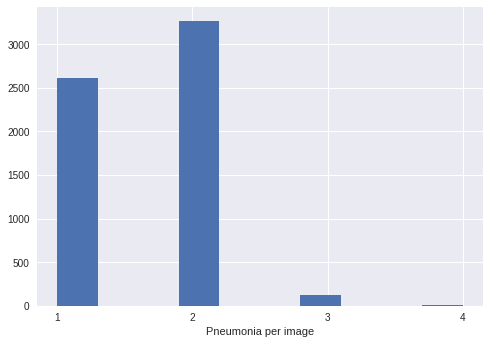

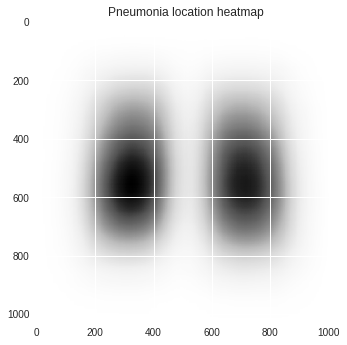

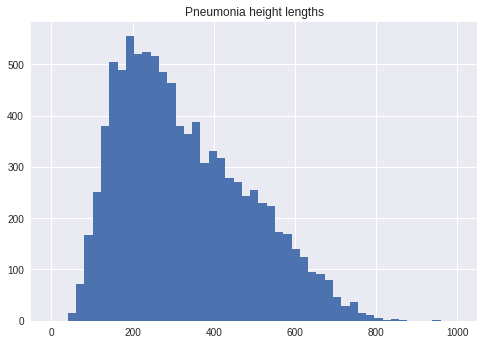

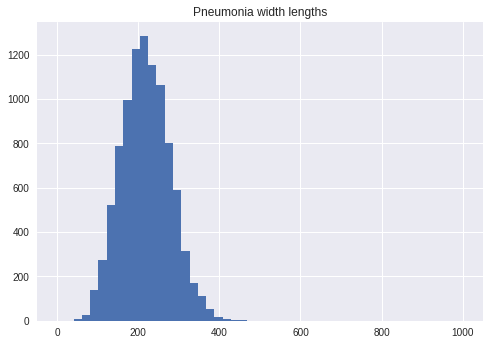

Minimum pneumonia height: 45
Minimum pneumonia width:  40


In [23]:
print('Total train images:',len(filenames))
print('Images with pneumonia:', len(pneumonia_locations))

ns = [len(value) for value in pneumonia_locations.values()]
plt.figure()
plt.hist(ns)
plt.xlabel('Pneumonia per image')
plt.xticks(range(1, np.max(ns)+1))
plt.show()

heatmap = np.zeros((1024, 1024))
ws = []
hs = []
for values in pneumonia_locations.values():
    for value in values:
        x, y, w, h = value
        heatmap[y:y+h, x:x+w] += 1
        ws.append(w)
        hs.append(h)
plt.figure()
plt.title('Pneumonia location heatmap')
plt.imshow(heatmap)
plt.figure()
plt.title('Pneumonia height lengths')
plt.hist(hs, bins=np.linspace(0,1000,50))
plt.show()
plt.figure()
plt.title('Pneumonia width lengths')
plt.hist(ws, bins=np.linspace(0,1000,50))
plt.show()
print('Minimum pneumonia height:', np.min(hs))
print('Minimum pneumonia width: ', np.min(ws))

In [0]:
!mkdir '/content/Histopathologic-Cancer-Detection'

In [0]:
if not os.path.isdir('/content/Histopathologic-Cancer-Detection/test'):
  !mkdir '/content/Histopathologic-Cancer-Detection/test'
  
if not os.path.isdir('/content/Histopathologic-Cancer-Detection/train'):
  !mkdir '/content/Histopathologic-Cancer-Detection/train'  

To copy file into colab from GCD

In [0]:
if not os.path.isfile('/content/Histopathologic-Cancer-Detection/test.zip'):
  !cp '/content/drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/test.zip' '/content/Histopathologic-Cancer-Detection'
else:
  print('file exists')

In [0]:
import glob
HCDBaseDirTestDir_files = sorted(glob.glob('/content/Histopathologic-Cancer-Detection/test/*'))
#archived_files = [f for f in ipynb_files if int(f.split('/')[-1][:2]) % 2]
archived_files = [f for f in HCDBaseDirTestDir_files]
print(len(archived_files))
if len(archived_files) == 0:
  !unzip "/content/Histopathologic-Cancer-Detection/test.zip" -d "/content/Histopathologic-Cancer-Detection/test/"
  print(len(archived_files) + ' files unzipped')
else:
  print('already unzipped')


In [0]:
HCDBaseDirTestDir_files = sorted(glob.glob('/content/Histopathologic-Cancer-Detection/test/*'))
#archived_files = [f for f in ipynb_files if int(f.split('/')[-1][:2]) % 2]
archived_files = [f for f in HCDBaseDirTestDir_files]
print(len(archived_files))

In [0]:
!kaggle competitions files -c histopathologic-cancer-detection

name                   size  creationDate         
---------------------  ----  -------------------  
sample_submission.csv   2MB  2018-11-15 23:20:36  
train_labels.csv        9MB  2018-11-15 23:20:37  
test.zip                1GB  2018-11-15 23:21:06  
train.zip               5GB  2018-11-15 23:23:49  


In [0]:
!cp '/content/drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/model.h5' '/content/Histopathologic-Cancer-Detection/'

Download competition files to colab folders

In [0]:
if not os.path.isfile("/content/Histopathologic-Cancer-Detection/train_labels.csv.zip"):
  !kaggle competitions download -c histopathologic-cancer-detection -f sample_submission.csv -p "/content/Histopathologic-Cancer-Detection/"
  !kaggle competitions download -c histopathologic-cancer-detection -f train_labels.csv -p "/content/Histopathologic-Cancer-Detection/"
  !kaggle competitions download -c histopathologic-cancer-detection -f test.zip -p "/content/Histopathologic-Cancer-Detection/"
  !kaggle competitions download -c histopathologic-cancer-detection -f train.zip -p "/content/Histopathologic-Cancer-Detection/"


  0% 0.00/1.33M [00:00<?, ?B/s]
100% 1.33M/1.33M [00:00<00:00, 44.2MB/s]
  0% 0.00/5.10M [00:00<?, ?B/s]
100% 5.10M/5.10M [00:00<00:00, 46.9MB/s]
test.zip: Skipping, found more recently modified local copy (use --force to force download)
100% 4.97G/4.98G [00:37<00:00, 134MB/s]
100% 4.98G/4.98G [00:37<00:00, 142MB/s]


In [0]:
if not os.path.isfile("/content/Histopathologic-Cancer-Detection/train_labels.csv"):
  !unzip "/content/Histopathologic-Cancer-Detection/train_labels.csv.zip" -d "/content/Histopathologic-Cancer-Detection/"
  
if not os.path.isfile("/content/Histopathologic-Cancer-Detection/sample_submission.csv"):
  !unzip "/content/Histopathologic-Cancer-Detection/sample_submission.csv.zip" -d "/content/Histopathologic-Cancer-Detection/"  

Archive:  /content/Histopathologic-Cancer-Detection/train_labels.csv.zip
  inflating: /content/Histopathologic-Cancer-Detection/train_labels.csv  
Archive:  /content/Histopathologic-Cancer-Detection/sample_submission.csv.zip
  inflating: /content/Histopathologic-Cancer-Detection/sample_submission.csv  


In [0]:
HCDTrainDir_files = sorted(glob.glob('/content/Histopathologic-Cancer-Detection/train/*'))
archived_files = 0
archived_files = [f for f in HCDTrainDir_files]
print(len(archived_files))
if len(archived_files) == 0:
  !unzip "/content/Histopathologic-Cancer-Detection/train.zip" -d "/content/Histopathologic-Cancer-Detection/train/"
else:
  print('already unzipped')

In [0]:
if not os.path.isfile("drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/train_labels.csv"):
  !unzip "drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/train_labels.csv.zip" -d "drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection"

In [0]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import glob


In [0]:
#GoogleDriveHandler?

In [0]:
gcd_ID = drive_handler.path_to_id('/content/drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/')
gcd_ID
#drive_handler.list_folder(gcd_ID)

In [0]:
os.path.isdir('/content/drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/base_dir/train_dir/a_no_tumor_tissue/')

True

In [0]:
'''
#import glob
HCDBaseDirTrainDir_files = sorted(glob.glob('/content/drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/base_dir/train_dir/a_no_tumor_tissue/*'))
#archived_files = [f for f in ipynb_files if int(f.split('/')[-1][:2]) % 2]
archived_files = [f for f in HCDBaseDirTrainDir_files]
print(len(archived_files))


#for f in archived_files:
#    print(f)

'''

In [0]:
#!cp -r '/content/drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/base_dir' '/content/Histopathologic-Cancer-Detection/base_dir'

In [0]:

#tar_file_path = create_archive('HCDBaseDirTrainDir', local_file_paths=archived_files[:10], verbose=True)
#tar_file_path

In [0]:
#print([x for x in dir(GoogleDriveHandler)])

Example of how to archive files in notebook

In [0]:
'''
ipynb_files = sorted(glob.glob('sample_data/*.csv'))
#archived_files = [f for f in ipynb_files if int(f.split('/')[-1][:2]) % 2]
archived_files = [f for f in ipynb_files]
for f in archived_files:
    print(f)
    
'''    

In [0]:
#tar_file_path = create_archive('sample_archive', local_file_paths=archived_files, verbose=True)
#tar_file_path

In [0]:
#!ls -l '/tmp/sample_archive.tar.gz'

Example of how to create folders in GCD using drive handler

In [0]:
'''
test_folder_id = drive_handler.create_folder('test_folder')
test_folder_id

test_subfolder_id = drive_handler.create_folder('test_sub_folder', parent_path='test_folder')
test_subfolder_id

same_subfolder_id = drive_handler.create_folder('test_sub_folder', parent_path='test_folder')
test_subfolder_id

same_subfolder_id2 = drive_handler.create_folder('test_sub_folder2', parent_path='test_folder')
test_subsubfolder_id = drive_handler.create_folder('test_sub_sub_folder', parent_path='test_folder/test_sub_folder2')
'''

Examples of how to access list of files in a folder using drive handler

In [0]:
'''
ID = drive_handler.path_to_id('test_folder/test_sub_folder2/test_sub_sub_folder')
ID, test_subsubfolder_id

drive_handler.list_folder(test_folder_id)
drive_handler.list_folder(test_folder_id, max_depth=1)
'''

To upload file to GCD

In [0]:
#drive_handler.upload(tar_file_path, parent_path='test_folder/test_sub_folder2')


To download file into Colab from GCD

In [0]:
#drive_handler.download('/tmp/downloaded_archive.tar.gz', target_path='test_folder/test_sub_folder2/sample_archive.tar.gz')
#!ls -l '/tmp/'

In [0]:
'''
ipynb_files = sorted(glob.glob('sample_data/*.csv'))
#archived_files = [f for f in ipynb_files if int(f.split('/')[-1][:2]) % 2]
archived_files = [f for f in ipynb_files]
for f in archived_files:
    print(f)

'''

In [0]:
'''
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html

# 2. Create & upload a file text file.
uploaded = drive.CreateFile({'title': 'Sample upload.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

# 3. Load a file by ID and print its contents.
downloaded = drive.CreateFile({'id': uploaded.get('id')})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))
'''

In [0]:
from numpy.random import seed
seed(101)
from tensorflow import set_random_seed
set_random_seed(101)

import pandas as pd
import numpy as np


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

import os
import cv2

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
IMAGE_SIZE = 96
IMAGE_CHANNELS = 3

SAMPLE_SIZE = 80000 # the number of images we use from each of the two classes

Give read write access to train_labels.csv

In [0]:
!ls -l '/content/Histopathologic-Cancer-Detection/train_labels.csv'

---------- 1 root root 9461084 Nov 15 23:48 /content/Histopathologic-Cancer-Detection/train_labels.csv


In [0]:
!chmod 600 '/content/Histopathologic-Cancer-Detection/train_labels.csv'
!ls -l '/content/Histopathologic-Cancer-Detection/train_labels.csv'

-rw------- 1 root root 9461084 Nov 15 23:48 /content/Histopathologic-Cancer-Detection/train_labels.csv


In [0]:
df_data = pd.read_csv('/content/Histopathologic-Cancer-Detection/train_labels.csv', engine='python')

# removing this image because it caused a training error previously
df_data[df_data['id'] != 'dd6dfed324f9fcb6f93f46f32fc800f2ec196be2']

# removing this image because it's black
df_data[df_data['id'] != '9369c7278ec8bcc6c880d99194de09fc2bd4efbe']


print(df_data.shape)

In [0]:
df_data['label'].value_counts()

In [0]:
# source: https://www.kaggle.com/gpreda/honey-bee-subspecies-classification

def draw_category_images(col_name,figure_cols, df, IMAGE_PATH):
    
    """
    Give a column in a dataframe,
    this function takes a sample of each class and displays that
    sample on one row. The sample size is the same as figure_cols which
    is the number of columns in the figure.
    Because this function takes a random sample, each time the function is run it
    displays different images.
    """
    

    categories = (df.groupby([col_name])[col_name].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                         figsize=(4*figure_cols,4*len(categories))) # adjust size here
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[col_name]==cat].sample(figure_cols) # figure_cols is also the sample size
        for j in range(0,figure_cols):
            file=IMAGE_PATH + sample.iloc[j]['id'] + '.tif'
            #print(file)
            im=cv2.imread(file)
            #print(im)
            #print(im.shape)
            ax[i, j].imshow(im, resample=True, cmap='gray')
            ax[i, j].set_title(cat, fontsize=16)  
    plt.tight_layout()
    plt.show()

In [0]:
# below is not needed. This is a high cost operation. This cell was used when the dataset was stored in GCD
#import glob
#train_files = glob.glob('/content/Histopathologic-Cancer-Detection/train/*')
#print(len(train_files))
#df_train_files = pd.DataFrame(train_files)
#df_train_files.columns = ['filename']
#df_train_files['tmp_col'] = 0
#df_data_new = df_data.loc[df['id'].isin(df_train_files)]
#df_train_files_tmp = df_train_files['filename'].split(".")
#df_train_files_tmp = pd.DataFrame(df_train_files['filename'].apply(lambda x: x.split('.',1)))
#df_train_files_tmp1 = [x[0] for x in df_train_files_tmp.filename[:]]
#print(type(df_train_files_tmp1))

#df_train_files_tmp2 = pd.DataFrame(df_train_files_tmp1) #.apply(lambda x: x.split('/',1))
#df_train_files_tmp2.columns = ['filename']

#type(df_train_files_tmp2)
#df_train_files_tmp3 = pd.DataFrame(df_train_files_tmp2['filename'].apply(lambda x: x.split('/',-1)))
#df_train_files_tmp4 = [x[-1] for x in df_train_files_tmp3.filename[:]]
#df_train_files_tmp4[:10]
#df_data_new = df_data.loc[df_data['id'].isin(df_train_files_tmp4)]
#df_data_new.head()

In [0]:
print(df_data.shape)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(df_data.columns)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(df_data.head())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(df_data.id[:10])
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~')

In [0]:
IMAGE_PATH = '/content/Histopathologic-Cancer-Detection/train/' 

draw_category_images('label',3, df_data, IMAGE_PATH)

In [0]:
# take a random sample of class 0 with size equal to num samples in class 1
df_0 = df_data[df_data['label'] == 0].sample(SAMPLE_SIZE, random_state = 101)
# filter out class 1
df_1 = df_data[df_data['label'] == 1].sample(SAMPLE_SIZE, random_state = 101)

# concat the dataframes
df_data_new = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
# shuffle
df_data_new = shuffle(df_data_new)

df_data_new['label'].value_counts()

1    80000
0    80000
Name: label, dtype: int64

In [0]:
# train_test_split

# stratify=y creates a balanced validation set.
y = df_data_new['label']

df_train, df_val = train_test_split(df_data_new, test_size=0.10, random_state=101, stratify=y)

print(df_train.shape)
print(df_val.shape)

(144000, 2)
(16000, 2)


In [0]:
df_train['label'].value_counts()

1    72000
0    72000
Name: label, dtype: int64

In [0]:
df_val['label'].value_counts()

1    8000
0    8000
Name: label, dtype: int64

In [0]:
base_dir = '/content/Histopathologic-Cancer-Detection/base_dir'

In [0]:

# Create a new directory
if not os.path.isdir('/content/Histopathologic-Cancer-Detection/base_dir'):
  base_dir = '/content/Histopathologic-Cancer-Detection/base_dir'
  os.mkdir(base_dir)
else:
  print('dir already exists')
  data_populated = True


dir already exists


In [0]:
#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 2 folders inside 'base_dir':

# train_dir
    # a_no_tumor_tissue
    # b_has_tumor_tissue

# val_dir
    # a_no_tumor_tissue
    # b_has_tumor_tissue

if not data_populated:
  # create a path to 'base_dir' to which we will join the names of the new folders
  # train_dir
  train_dir = os.path.join(base_dir, 'train_dir')
  os.mkdir(train_dir)

  # val_dir
  val_dir = os.path.join(base_dir, 'val_dir')
  os.mkdir(val_dir)



  # [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
  # Inside each folder we create seperate folders for each class

  # create new folders inside train_dir
  no_tumor_tissue = os.path.join(train_dir, 'a_no_tumor_tissue')
  os.mkdir(no_tumor_tissue)
  has_tumor_tissue = os.path.join(train_dir, 'b_has_tumor_tissue')
  os.mkdir(has_tumor_tissue)


  # create new folders inside val_dir
  no_tumor_tissue = os.path.join(val_dir, 'a_no_tumor_tissue')
  os.mkdir(no_tumor_tissue)
  has_tumor_tissue = os.path.join(val_dir, 'b_has_tumor_tissue')
  os.mkdir(has_tumor_tissue)
else:
  print('sub directories already created')


sub directories already created


In [0]:

# check that the folders have been created
print(os.listdir(base_dir + '/train_dir'))
print(os.listdir(base_dir + '/val_dir'))


['a_no_tumor_tissue', 'b_has_tumor_tissue']
['a_no_tumor_tissue', 'b_has_tumor_tissue']


In [0]:

# Set the id as the index in df_data
df_data_new.set_index('id', inplace=True)


In [0]:
if not data_populated:

  # Get a list of train and val images
  train_list = list(df_train['id'])
  val_list = list(df_val['id'])

  train_src_dir = '/content/Histopathologic-Cancer-Detection/train'



  # Transfer the train images

  for image in train_list:

      # the id in the csv file does not have the .tif extension therefore we add it here
      fname = image + '.tif'
      # get the label for a certain image
      target = df_data_new.loc[image,'label']

      # these must match the folder names
      if target == 0:
          label = 'a_no_tumor_tissue'
      if target == 1:
          label = 'b_has_tumor_tissue'

      # source path to image
      src = os.path.join(train_src_dir, fname)
      # destination path to image
      dst = os.path.join(train_dir, label, fname)
      # copy the image from the source to the destination
      shutil.copyfile(src, dst)


  # Transfer the val images

  for image in val_list:

      # the id in the csv file does not have the .tif extension therefore we add it here
      fname = image + '.tif'
      # get the label for a certain image
      target = df_data_new.loc[image,'label']

      # these must match the folder names
      if target == 0:
          label = 'a_no_tumor_tissue'
      if target == 1:
          label = 'b_has_tumor_tissue'


      # source path to image
      src = os.path.join(train_src_dir, fname)
      # destination path to image
      dst = os.path.join(val_dir, label, fname)
      # copy the image from the source to the destination
      shutil.copyfile(src, dst)



   

In [0]:
print(len(os.listdir(os.path.join(base_dir, 'train_dir','a_no_tumor_tissue'))))
print(len(os.listdir(os.path.join(base_dir, 'train_dir','b_has_tumor_tissue'))))

72000
72000


In [0]:
print(len(os.listdir(os.path.join(base_dir, 'val_dir','a_no_tumor_tissue'))))
print(len(os.listdir(os.path.join(base_dir, 'val_dir','b_has_tumor_tissue'))))

8000
8000


In [0]:
train_path = base_dir + '/train_dir'
valid_path = base_dir + '/val_dir'
test_path = '/content/Histopathologic-Cancer-Detection/test'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

print(num_train_samples)
print(num_val_samples)

144000
16000


In [0]:
datagen = ImageDataGenerator(rescale=1.0/255)

In [0]:


train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


In [0]:
kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3


model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', input_shape = (96, 96, 3)))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "softmax"))

model.summary()

In [0]:
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [0]:
print(val_gen.class_indices)

{'a_no_tumor_tissue': 0, 'b_has_tumor_tissue': 1}


In [0]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=20, verbose=1,
                   callbacks=callbacks_list)

In [0]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'acc']

In [0]:
# Here the best epoch will be used.

!cp 'model.h5' '/content/drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection'
model.load_weights('/content/Histopathologic-Cancer-Detection/model.h5')


In [0]:

val_loss, val_acc = \
model.evaluate_generator(test_gen, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_acc:', val_acc)

In [0]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

Make a prediction on the val set
We need these predictions to calculate the AUC score, print the Confusion Matrix and calculate the F1 score.

In [0]:
# make a prediction
predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

16000/16000 [==============================] - 66s 4ms/step


In [0]:
predictions.shape


(16000, 2)

A note on Keras class index values
Keras assigns it's own index value (here 0 and 1) to the classes. It infers the classes based on the folder structure.
Important: These index values may not match the index values we were given in the train_labels.csv file.

I've used 'a' and 'b' folder name pre-fixes to get keras to assign index values to match what was in the train_labels.csv file - I guessed that keras is assigning the index value based on folder name alphabetical order.

In [0]:
# This is how to check what index keras has internally assigned to each class. 
test_gen.class_indices

{'a_no_tumor_tissue': 0, 'b_has_tumor_tissue': 1}

In [0]:
# Put the predictions into a dataframe.
# The columns need to be oredered to match the output of the previous cell

df_preds = pd.DataFrame(predictions, columns=['no_tumor_tissue', 'has_tumor_tissue'])

df_preds.head()

In [0]:
# Get the true labels
y_true = test_gen.classes

# Get the predicted labels as probabilities
y_pred = df_preds['has_tumor_tissue']

What is the AUC Score?


In [0]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred)

0.985324734375

Create a Confusion Matrix


In [0]:
# Source: Scikit Learn website
# http://scikit-learn.org/stable/auto_examples/
# model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-
# selection-plot-confusion-matrix-py


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
# Get the labels of the test images.

test_labels = test_gen.classes

In [0]:
test_labels.shape


(16000,)

In [0]:
# argmax returns the index of the max value in a row
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))


In [0]:
# Print the label associated with each class
test_gen.class_indices

{'a_no_tumor_tissue': 0, 'b_has_tumor_tissue': 1}

In [0]:
# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = ['no_tumor_tissue', 'has_tumor_tissue']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

Create a Classification Report


In [0]:
from sklearn.metrics import classification_report

# Generate a classification report

# For this to work we need y_pred as binary labels not as probabilities
y_pred_binary = predictions.argmax(axis=1)

report = classification_report(y_true, y_pred_binary, target_names=cm_plot_labels)

print(report)

Recall = Given a class, will the classifier be able to detect it?
Precision = Given a class prediction from a classifier, how likely is it to be correct?
F1 Score = The harmonic mean of the recall and precision. Essentially, it punishes extreme values.

From the confusion matrix and classification report we see that our model is equally good at detecting both classes.

**MAKE A TEST SET PREDICTION**

In [0]:
# Delete base_dir and it's sub folders to free up disk space.

#shutil.rmtree('base_dir')

In [0]:


#[CREATE A TEST FOLDER DIRECTORY STRUCTURE]

# We will be feeding test images from a folder into predict_generator().
# Keras requires that the path should point to a folder containing images and not
# to the images themselves. That is why we are creating a folder (test_images) 
# inside another folder (test_dir).

# test_dir
    # test_images

# create test_dir
test_dir = 'test_dir'
os.mkdir(test_dir)
    
# create test_images inside test_dir
test_images = os.path.join(test_dir, 'test_images')
os.mkdir(test_images)



In [0]:
# check that the directory we created exists
os.listdir('test_dir')

['test_images']

In [0]:

# Transfer the test images into image_dir

test_list = os.listdir('/content/Histopathologic-Cancer-Detection/test')

for image in test_list:
    
    fname = image
    
    # source path to image
    src = os.path.join('/content/Histopathologic-Cancer-Detection/test', fname)
    # destination path to image
    dst = os.path.join(test_images, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    

In [0]:
# check that the images are now in the test_images
# Should now be 57458 images in the test_images folder

len(os.listdir('test_dir/test_images'))

57458

**Set up the generator**


In [0]:
test_path ='test_dir'


# Here we change the path to point to the test_images folder.

test_gen = datagen.flow_from_directory(test_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)


Found 57458 images belonging to 1 classes.


**Make a prediction on the test images**


In [0]:
#Make a prediction on the test images
num_test_images = 57458

# make sure we are using the best epoch
model.load_weights('/content/Histopathologic-Cancer-Detection/model.h5')

predictions = model.predict_generator(test_gen, steps=num_test_images, verbose=1)


57458/57458 [==============================] - 202s 4ms/step


In [0]:
# Are the number of predictions correct?
# Should be 57458.

len(predictions)

NameError: ignored

In [0]:
print(predictions[:10])

[[1.5775146e-03 9.9842250e-01]
 [2.0336887e-02 9.7966307e-01]
 [8.9127407e-04 9.9910873e-01]
 [1.0000000e+00 3.4518170e-12]
 [9.8964953e-01 1.0350401e-02]
 [4.0871233e-01 5.9128767e-01]
 [9.8253858e-01 1.7461438e-02]
 [9.6905351e-01 3.0946460e-02]
 [1.9593172e-02 9.8040682e-01]
 [2.4712931e-01 7.5287068e-01]]


In [0]:
# Put the predictions into a dataframe

df_preds = pd.DataFrame(predictions, columns=['no_tumor_tissue', 'has_tumor_tissue'])

df_preds.head()

,no_tumor_tissue,has_tumor_tissue
0,0.001578,9.984225e-01
1,0.020337,9.796631e-01
2,0.000891,9.991087e-01
3,1.000000,3.451817e-12
4,0.989650,1.035040e-02


In [0]:
# This outputs the file names in the sequence in which 
# the generator processed the test images.
test_filenames = test_gen.filenames

# add the filenames to the dataframe
df_preds['file_names'] = test_filenames

df_preds.head()

,no_tumor_tissue,has_tumor_tissue,file_names
0,0.001578,9.984225e-01,test_images/00006537328c33e284c973d7b39d340809...
1,0.020337,9.796631e-01,test_images/0000ec92553fda4ce39889f9226ace43ca...
2,0.000891,9.991087e-01,test_images/00024a6dee61f12f7856b0fc6be20bc7a4...
3,1.000000,3.451817e-12,test_images/000253dfaa0be9d0d100283b22284ab2f6...
4,0.989650,1.035040e-02,test_images/000270442cc15af719583a8172c87cd2bd...


In [0]:
# Create an id column

# A file name now has this format: 
# test_images/00006537328c33e284c973d7b39d340809f7271b.tif

# This function will extract the id:
# 00006537328c33e284c973d7b39d340809f7271b


def extract_id(x):
    
    # split into a list
    a = x.split('/')
    # split into a list
    b = a[1].split('.')
    extracted_id = b[0]
    
    return extracted_id

df_preds['id'] = df_preds['file_names'].apply(extract_id)

df_preds.head()

In [0]:
# Get the predicted labels.
# We were asked to predict a probability that the image has tumor tissue
y_pred = df_preds['has_tumor_tissue']

# get the id column
image_id = df_preds['id']

**Create a submission file**


In [0]:
# Create a submission file
submission = pd.DataFrame({'id':image_id, 
                           'label':y_pred, 
                          }).set_index('id')

submission.to_csv('patch_preds.csv', columns=['label']) 


In [0]:
!cp 'patch_preds.csv' '/content/drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection'

In [0]:
submission.head()


In [0]:
# Delete the test_dir directory we created to prevent a Kaggle error.
# Kaggle allows a max of 500 files to be saved.

shutil.rmtree('test_dir')

**Below section predicts cancer probability for a given image. The image should be provided in a folder to build batch generator. The pretrained weights will be loaded in a model that is a replica of the model used for training.**

In [0]:
import os
import glob

In [0]:
# create basic directory structure and get the test images to be used for prediction
!mkdir '/content/Histopathologic-Cancer-Detection'

In [0]:
if not os.path.isdir('/content/Histopathologic-Cancer-Detection/test'):
  !mkdir '/content/Histopathologic-Cancer-Detection/test'

In [0]:
if not os.path.isfile('/content/Histopathologic-Cancer-Detection/test.zip'):
  !cp '/content/drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/test.zip' '/content/Histopathologic-Cancer-Detection'
else:
  print('file exists')

In [0]:
import glob
HCDBaseDirTestDir_files = sorted(glob.glob('/content/Histopathologic-Cancer-Detection/test/*'))
#archived_files = [f for f in ipynb_files if int(f.split('/')[-1][:2]) % 2]
archived_files = [f for f in HCDBaseDirTestDir_files]
print(len(archived_files))
if len(archived_files) == 0:
  !unzip "/content/Histopathologic-Cancer-Detection/test.zip" -d "/content/Histopathologic-Cancer-Detection/test/"
else:
  print('already unzipped')

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [0]:
# create replica of the model. No need to compile the model

kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3


model_replica = Sequential()
model_replica.add(Conv2D(first_filters, kernel_size, activation = 'relu', input_shape = (96, 96, 3)))
model_replica.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model_replica.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model_replica.add(MaxPooling2D(pool_size = pool_size)) 
model_replica.add(Dropout(dropout_conv))

model_replica.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model_replica.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model_replica.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model_replica.add(MaxPooling2D(pool_size = pool_size))
model_replica.add(Dropout(dropout_conv))

model_replica.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model_replica.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model_replica.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model_replica.add(MaxPooling2D(pool_size = pool_size))
model_replica.add(Dropout(dropout_conv))

model_replica.add(Flatten())
model_replica.add(Dense(256, activation = "relu"))
model_replica.add(Dropout(dropout_dense))
model_replica.add(Dense(2, activation = "softmax"))

model_replica.summary()

In [0]:
model_replica.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [0]:
!cp '/content/drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/model.h5' '/content/Histopathologic-Cancer-Detection/'
model_replica.load_weights('/content/Histopathologic-Cancer-Detection/model.h5')


In [0]:
#find full filename of a random file in the test folder

filename = glob.glob('/content/Histopathologic-Cancer-Detection/test/00006537328c33e284c973d7b39d340809*')
print(filename)

['/content/Histopathologic-Cancer-Detection/test/00006537328c33e284c973d7b39d340809f7271b.tif']


In [0]:
!mkdir '/content/predict'
!mkdir '/content/predict/pics'

In [0]:
!cp '/content/Histopathologic-Cancer-Detection/test/00006537328c33e284c973d7b39d340809f7271b.tif' '/content/predict/pics'

In [0]:
datagen_pred = ImageDataGenerator(rescale=1.0/255)

In [0]:
IMAGE_SIZE = 96
test_gen_per_image = datagen_pred.flow_from_directory('/content/predict',
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 1 images belonging to 1 classes.


In [0]:
model_replica.predict_generator(test_gen_per_image, steps=1, verbose=1)

1/1 [==============================] - 0s 10ms/step


array([[0.00157751, 0.9984225 ]], dtype=float32)